In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('fake_bills.csv')

In [4]:
df = df.dropna()

In [5]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [7]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [8]:
df.nunique()

is_genuine        2
diagonal        158
height_left     154
height_right    169
margin_low      285
margin_up       123
length          332
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [11]:
scalar=StandardScaler()

In [12]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [13]:
df1 = df[['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']]

In [14]:
scaled_df=scalar.fit_transform(df1)

In [15]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(data=principal_components,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.627035,0.807294
1,2.017133,-2.217975
2,0.996369,2.596334
3,1.379560,-1.809941
4,-0.138409,-0.597355
...,...,...
1458,-1.415019,-0.260032
1459,-3.261672,1.330325
1460,-1.878843,-0.599267
1461,-1.775458,0.506379


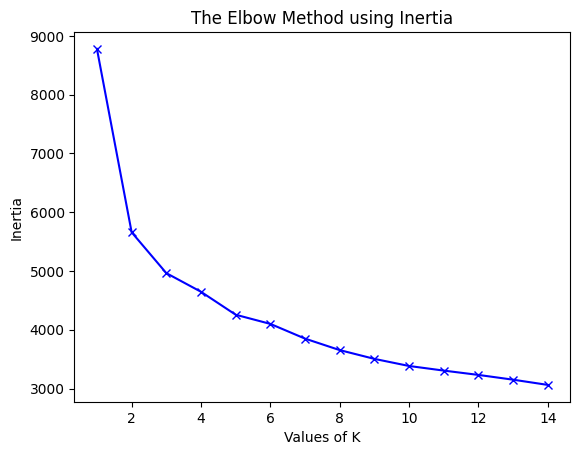

In [16]:
inertia = []

range_val = range(1, 15)

for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)

plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [21]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)
pca_df_kmeans


,PCA1,PCA2,cluster
0,-1.627035,0.807294,1
1,2.017133,-2.217975,0
2,0.996369,2.596334,0
3,1.379560,-1.809941,0
4,-0.138409,-0.597355,0
...,...,...,...
1458,-1.415019,-0.260032,1
1459,-3.261672,1.330325,1
1460,-1.878843,-0.599267,1
1461,-1.775458,0.506379,1


<function matplotlib.pyplot.show(close=None, block=None)>

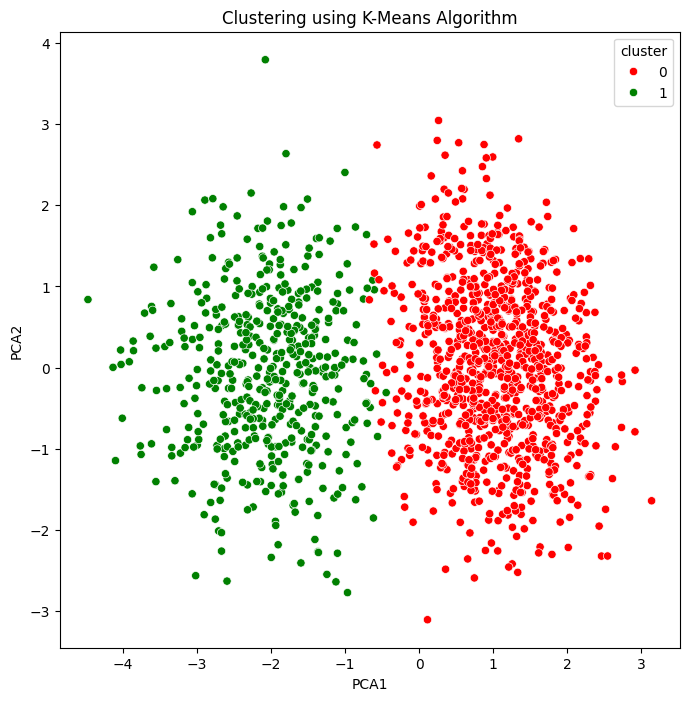

In [22]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show

In [19]:
kmeans_model = KMeans(2)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat([pca_df, pd.DataFrame({'cluster':kmeans_model.labels_})], axis =1 )

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
sill_coeff = silhouette_score(pca_df_kmeans.drop('cluster', axis = 1), pca_df_kmeans["cluster"])

In [22]:
print("Sillehouette Coefficient :", round(sill_coeff, 3))

Sillehouette Coefficient : 0.539


In [23]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(scaled_df)

In [28]:
pca_df_agg=pd.concat([pca_df,pd.DataFrame({'cluster':cluster.labels_})], axis=1)

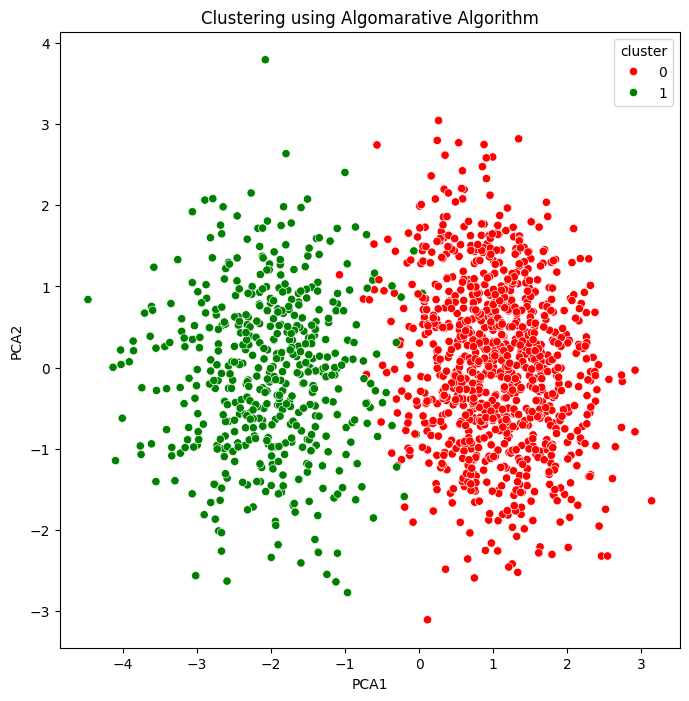

In [32]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_agg, palette=['red', 'green',])
plt.title("Clustering using Algomarative Algorithm")
plt.show()

In [33]:
sill_coeff = silhouette_score(pca_df_agg.drop('cluster', axis = 1), pca_df_agg["cluster"])

In [34]:
print("Sillehouette Coefficient :", round(sill_coeff, 3))

Sillehouette Coefficient : 0.532
